In [ ]:
# df['DATE_SPK'].count()
df.info()
def get_df_size(df):
  return df.memory_usage(deep=True).sum()

df_size = get_df_size(df)
print(f"Tamaño del DataFrame: {df_size} bytes")

<class 'pandas.core.frame.DataFrame'>
Index: 206268 entries, 0 to 60117
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   DATE_SPK              206268 non-null  object
 1   SCORE                 206268 non-null  int64 
 2   SCORE_CLASSIFICATION  206268 non-null  object
 3   COMMENT               84930 non-null   object
 4   COUPON_CODE           206268 non-null  bool  
dtypes: bool(1), int64(1), object(3)
memory usage: 8.1+ MB
Tamaño del DataFrame: 43601267 bytes


In [ ]:
import re
print(f"Documentos vacios (Reviews sin comentario): {df['COMMENT'].isna().sum()}")
# Define a function to check for emojis
def has_emojis(text):
  if isinstance(text, str): # Check if the text is a string
    emoji_pattern = re.compile("["
                             u"\U0001F600-\U0001F64F"  # emoticons
                             u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                             u"\U0001F680-\U0001F6FF"  # transport & map symbols
                             u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                             u"\U00002702-\U000027B0"
                             u"\U000024C2-\U0001F251"
                             "]+", flags=re.UNICODE)
    return emoji_pattern.search(text) is not None
  else: # Handle non-string values
    return False

# Apply the function to the desired column and count the True values
emoji_count = df['COMMENT'].apply(has_emojis).sum()

print(f"Documentos con emojis: {emoji_count}")

Documentos vacios (Reviews sin comentario): 121338
Documentos con emojis: 1472


In [ ]:
121338/206268

0.5882541160044215

In [ ]:
# Se eliminan los Nan
df = df.dropna(subset=['COMMENT'])
df['COMMENT'].count()

84930

In [ ]:
# Vamos a ver si ademas de los campos nulos, hay registros duplicados
duplicated_rows = df[df.duplicated(keep=False)]

# Cuenta el número de filas duplicadas
num_duplicated_rows = len(duplicated_rows)

print(f"Número de filas duplicadas: {num_duplicated_rows}")

Número de filas duplicadas: 45983


In [ ]:
# Eliminar duplicados y mantener solo la primera aparición
df = df.drop_duplicates()

# Muestra el DataFrame sin duplicados
print("DataFrame sin duplicados:")
print(df['COMMENT'].count())

DataFrame sin duplicados:
55524


In [ ]:
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

spacy.cli.download("es_core_news_sm")

✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load("es_core_news_sm")

def to_spacy(df, nlp):
    comments = df['COMMENT'].tolist()
    comments = list(nlp.pipe(comments))
    return comments

corpus = to_spacy(df, nlp)

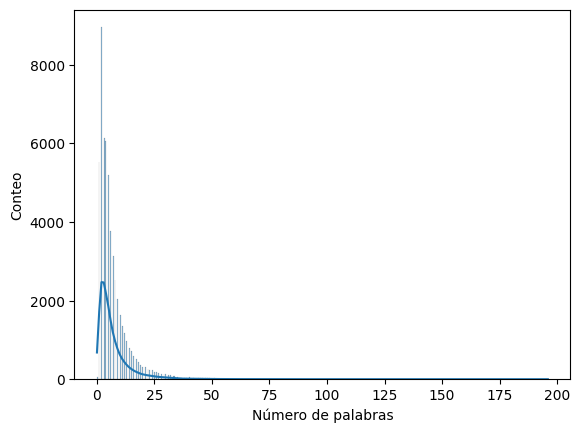

In [ ]:
def count_words(corpus):
    counts = []
    for doc in corpus:
        word_count = len(doc)
        counts.append(word_count)
    return counts

counts = count_words(corpus)

# Grafico
fig, ax = plt.subplots()
sns.histplot(counts, kde=True, ax=ax)
ax.set_xlabel("Número de palabras")
ax.set_ylabel("Conteo")
fig.show()

In [ ]:
# Calculo del percentil 99

quartiles = np.percentile(counts, [99])
print(f"Percentil 99: {quartiles}")

Percentil 99: [43.]


In [ ]:
# Conteo de los comentarios con una longitud mayor a 44 palabras
count = 0
for word_count in counts:
    if word_count > 44:
        count += 1
# Ejemplo de una review con mas de 44 palabras
print(f"Number of documents with more than 44 words: {count}")
for doc in corpus:
  if len(doc) > 44:
    print(f"comentario:{doc}")
    break

Number of documents with more than 44 words: 501
comentario:No sé porqué varía mucho las cervezas que veo un día en una zona, a la saqué veo días después en la misma zona. Eso a veces me desanima para no usar la app, cuando no veo las cervezas que ya he comprado ahí mismo.


In [ ]:
# Se observo incluso una review con mas de 150 palabras
found_count = 0
for doc in corpus:
  if len(doc) > 150:
    found_count += 1
    if found_count == 2:
      print(f"comentario:{doc}")
      break

comentario:El repartidor llegó muy tarde, debido a que en el GPS de él mi dirección le decía a otra parte, llego a mi domicilio y tuvo que hablar a su coordinador para que pudiera cerrar la venta ya que la APP del repartidor no la podia cerrar debido a que tenia que estar minimo 100 mts de la direccion de su GPS, tomo fotos de mi casa entregando el producto para confirmar con su coordinador, este problema yo personalmente ya le he reportado 4 veces a la línea de DDV pero ninguna señorita le da seguimiento ya que no generan ningún folio de reporte y no me llega ningún email del reporte en el cual estoy reportando problemas con el GPS de la aplicación. Así mismo el repartidor también me comento que ellos lo han reportado también sin respuesta por parte de los administradores de la APP, también me comento que no soy el único con este problema !!! Que necesitan para arreglar est situación!!?? A que otro número tengo que reportar esto ya que las que contestan no resuelven nada !!!


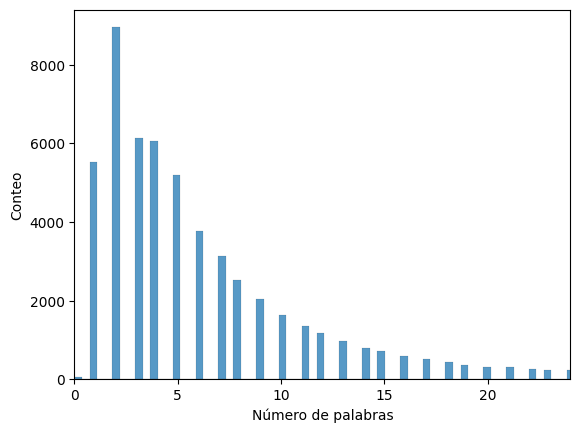

In [ ]:
# Grafico
fig, ax = plt.subplots()
sns.histplot(counts, kde=False, ax=ax)
ax.set_xlabel("Número de palabras")
ax.set_ylabel("Conteo")

ax.set_xlim(0, 24)  # Set the x-axis limit

fig.show()

In [ ]:
df.reset_index(inplace=True)
score = df['SCORE']
cupon = df['COUPON_CODE']
fecha = df['DATE_SPK']
comments = df['COMMENT']

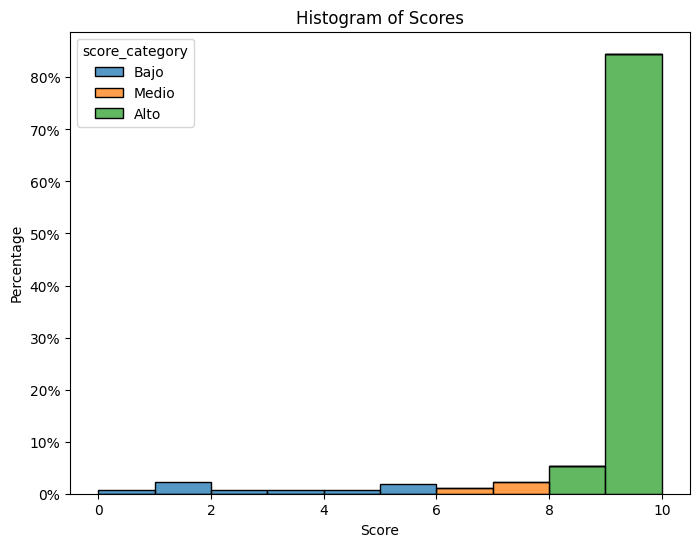

In [ ]:
# Create a new DataFrame with the score categories
df_scores = pd.DataFrame({'SCORE': score})
df_scores['score_category'] = pd.cut(df_scores['SCORE'], bins=[-1, 5, 7, 10], labels=['Bajo', 'Medio', 'Alto'])


plt.figure(figsize=(8, 6))
ax = sns.histplot(data=df_scores, x='SCORE', hue='score_category', multiple='stack', bins=10, stat='probability', common_norm=True)
plt.xlabel('Score')
plt.ylabel('Percentage')
plt.title('Histogram of Scores')

# Formatear el eje y como porcentajes
ax.yaxis.set_major_formatter(lambda y, _: '{:.0%}'.format(y))

plt.show()


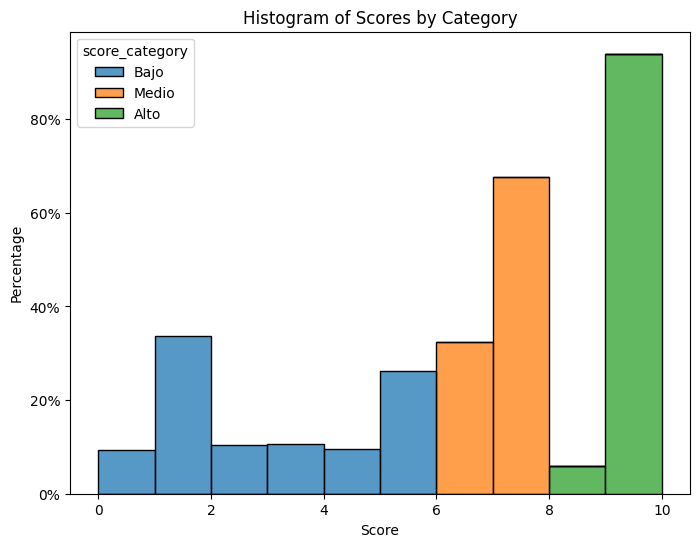

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=df_scores, x='SCORE', hue='score_category', multiple='stack', bins=10, stat='probability', common_norm=False)
plt.xlabel('Score')
plt.ylabel('Percentage')
plt.title('Histogram of Scores by Category')

# Formatear el eje y como porcentajes
ax.yaxis.set_major_formatter(lambda y, _: '{:.0%}'.format(y))

plt.show()

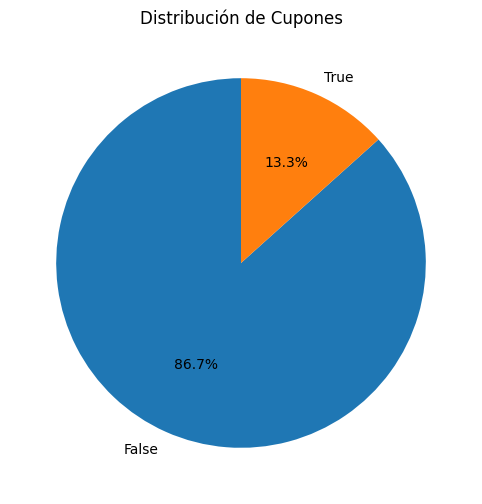

In [ ]:
# Contar la frecuencia de cada cupón
coupon_counts = cupon.value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(8, 6))
plt.pie(coupon_counts, labels=coupon_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Cupones')
plt.show()

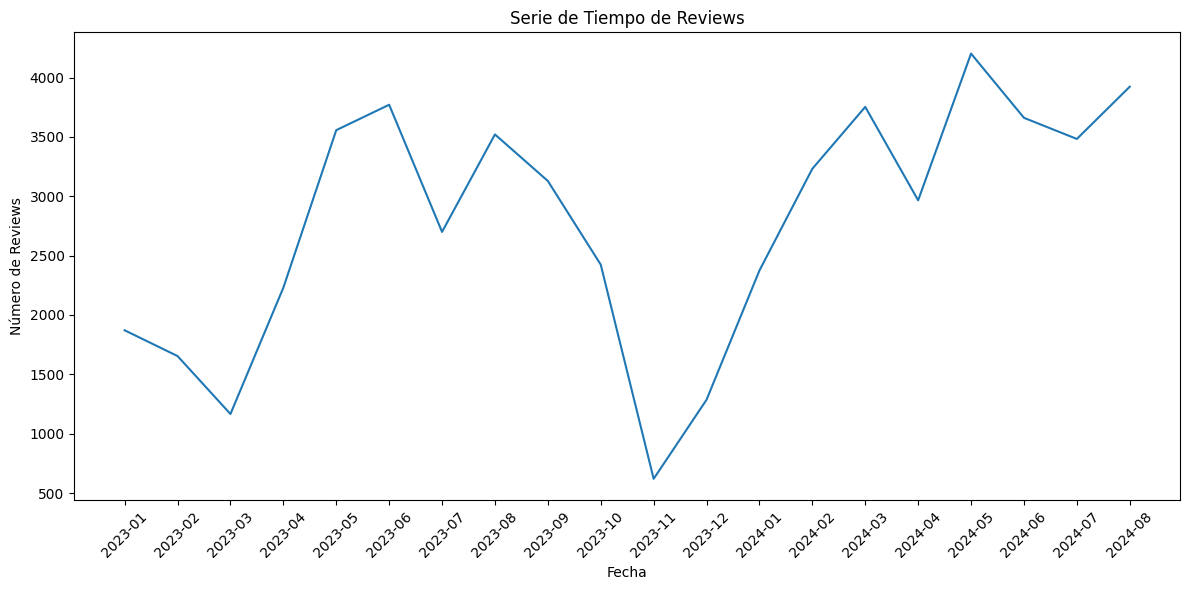

In [ ]:
# Convertir la columna 'DATE_SPK' a datetime si no lo está
df['DATE_SPK'] = pd.to_datetime(df['DATE_SPK'])
df['DATE_SPK'] = df['DATE_SPK'].dt.strftime('%Y-%m')

# Agrupar por fecha y contar las reviews
reviews_over_time = df.groupby('DATE_SPK').size()

# Crear la serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(reviews_over_time.index, reviews_over_time.values)
plt.xlabel('Fecha')
plt.ylabel('Número de Reviews')
plt.title('Serie de Tiempo de Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

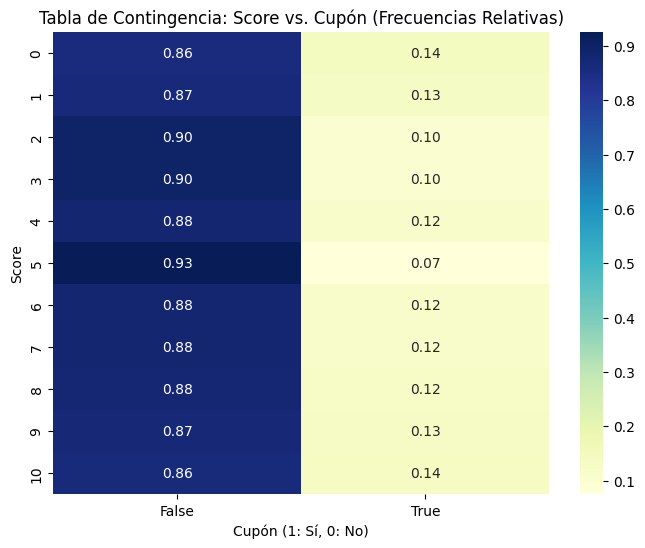

In [ ]:
# Crear una tabla de contingencia
contingency_table = pd.crosstab(df['SCORE'], df['COUPON_CODE'])

# Calcular las frecuencias relativas
relative_freq = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Crear un mapa de calor con frecuencias relativas
plt.figure(figsize=(8, 6))
sns.heatmap(relative_freq, annot=True, cmap="YlGnBu", fmt=".2f")
plt.xlabel('Cupón (1: Sí, 0: No)')
plt.ylabel('Score')
plt.title('Tabla de Contingencia: Score vs. Cupón (Frecuencias Relativas)')
plt.show()